# HOMEWORK 12

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [105]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 0

Go to the GTSRB dataset official site ([link](https://benchmark.ini.rub.de/gtsrb_dataset.html)) to learn more about the dataset.

### Step 1

Download the dataset ([link](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)) and unzip it.

### Step 2

For this homework, you will be working with the training set. Check out the `Train.csv`, open it and see what it contains. Load the dataset and plot random samples.

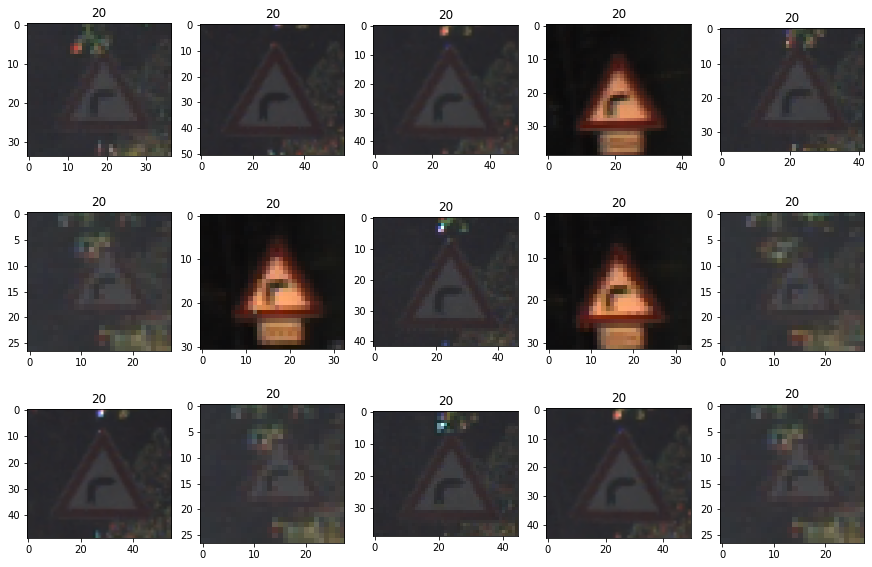

In [106]:
# Load the training labels
root = 'data/archive'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples (amount of samples in data)
num_samples = 43

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

### Step 3

Inspect the dataset by computing and plotting the per-class histogram.

In [107]:
# Extract class identifiers
# Hint: Check the csv 
ids = list(data.iloc[:]['ClassId'])

Compute the per class histogram. You can use any approach you want (e.g. `numpy`). It's also worth looking at the `Counter` function from the `collections` module ([link](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

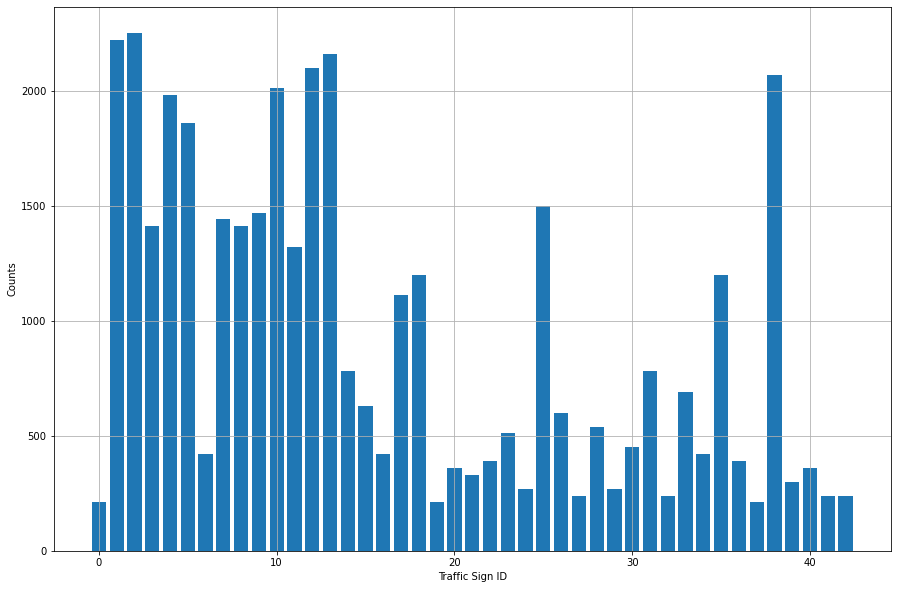

In [108]:
from collections import Counter
hist = Counter(ids)

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

### Questions

Please answer the following questions:
* Do you consider the dataset to be balanced? If so, why? If not, why?

I think dataset is not balanced enough, because min value of counter is 210 and max is 2250, which is bigger more than 10 times. Also I think 210 examples is not enough for real training, I would like to work with a more representative dataset, which is bigger than 1000, for example.

* Are there any classes that are (significantly) over-represented or under-represeneted?

under-represeneted:

class 0 (210 values)

class 6 (420 values)

class 16 (420 values)

class 19 (210 values)

class 21 (330 values)

class 22 (390 values)

class 24 (270 values)

class 27 (240 values)

class 29 (270 values)...

over-represented:

class 1 (2220 values)

class 2 (2250 values)

class 10 (2010 values)

class 12 (2100 values)

class 13 (2160 values)

class 38 (2070 values)

### Optional

Perform a further analysis on the dataset and draw some conclusion from it.

Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?

(Text(0.5, 0, 'Traffic Sign Width'), Text(0, 0.5, 'Counts'))

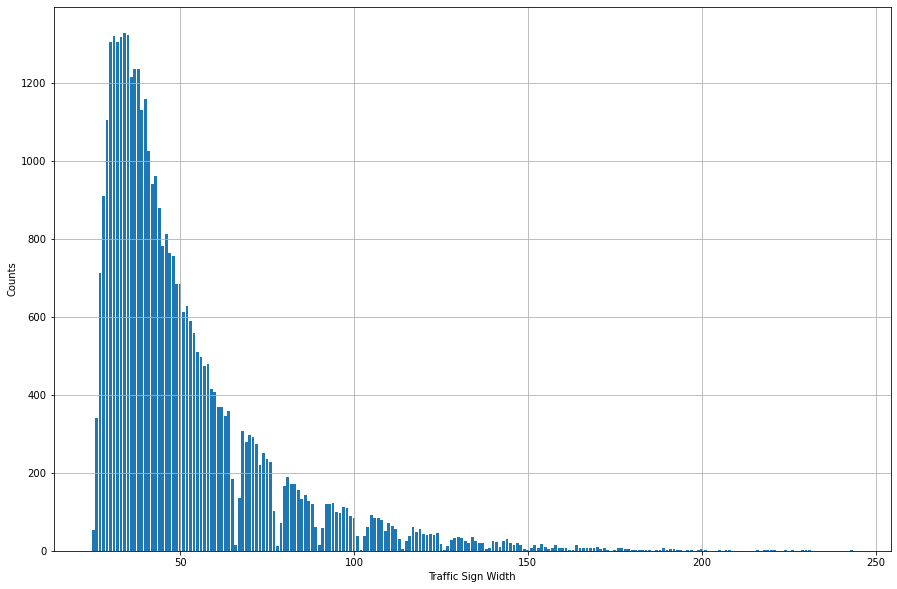

In [109]:
width = list(data.iloc[:]['Width'])

from collections import Counter
hist = Counter(width)

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign Width'), plt.ylabel('Counts')

(Text(0.5, 0, 'Traffic Sign Height'), Text(0, 0.5, 'Counts'))

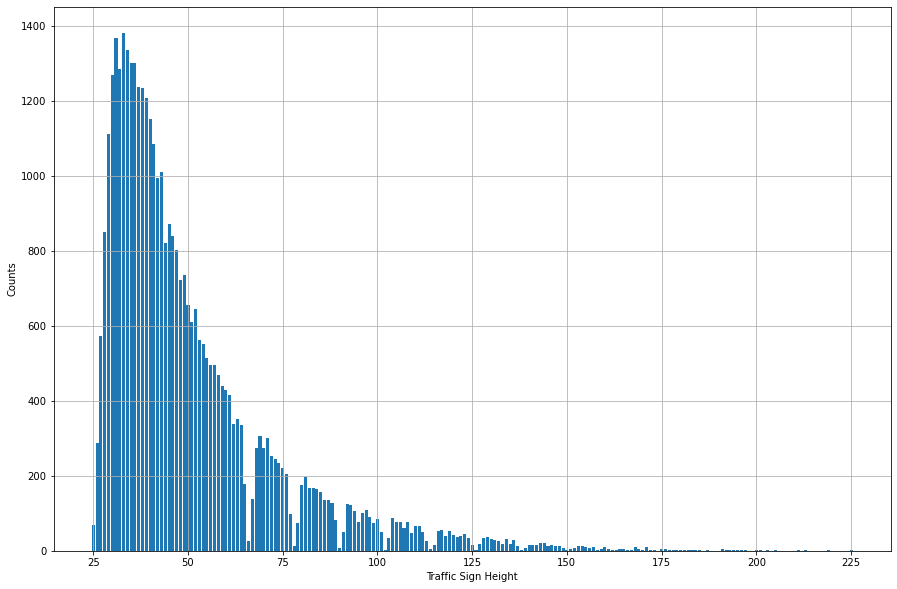

In [110]:
height = list(data.iloc[:]['Height'])

from collections import Counter
hist = Counter(height)

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign Height'), plt.ylabel('Counts')

I can see that dataset is balanced by looking at the resolution distribution.

Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?

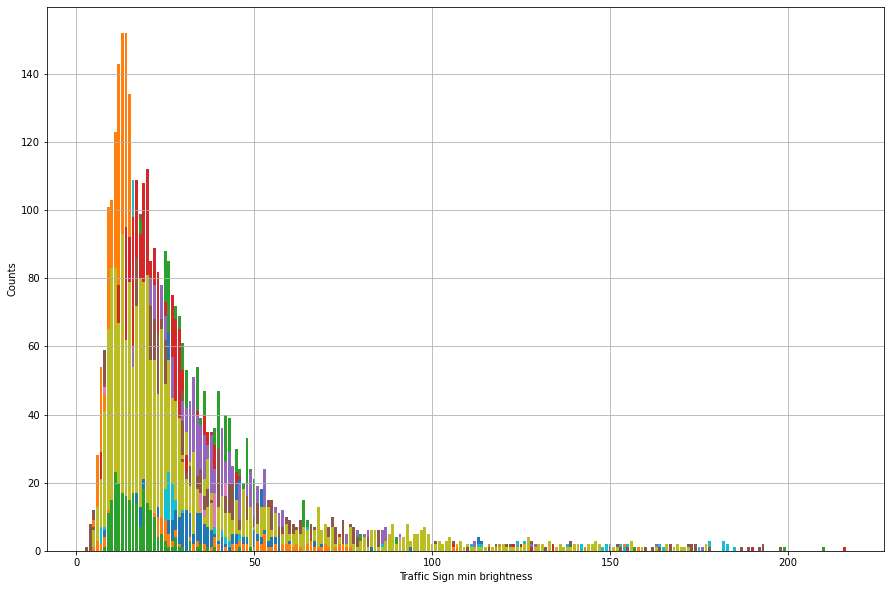

In [111]:
brightness = {}

for idx in range(39209):
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    H, S, V = cv2.split(img)
    
    classId = data.iloc[idx]['ClassId']
    val = min(np.concatenate(V))
    if classId not in brightness:
        brightness[classId] = [val]
    else:
        brightness[classId].append(val)

for idx in brightness:
    hist = Counter(brightness[idx])
    plt.bar(hist.keys(), hist.values()), plt.grid(True)
    plt.xlabel('Traffic Sign min brightness'), plt.ylabel('Counts')

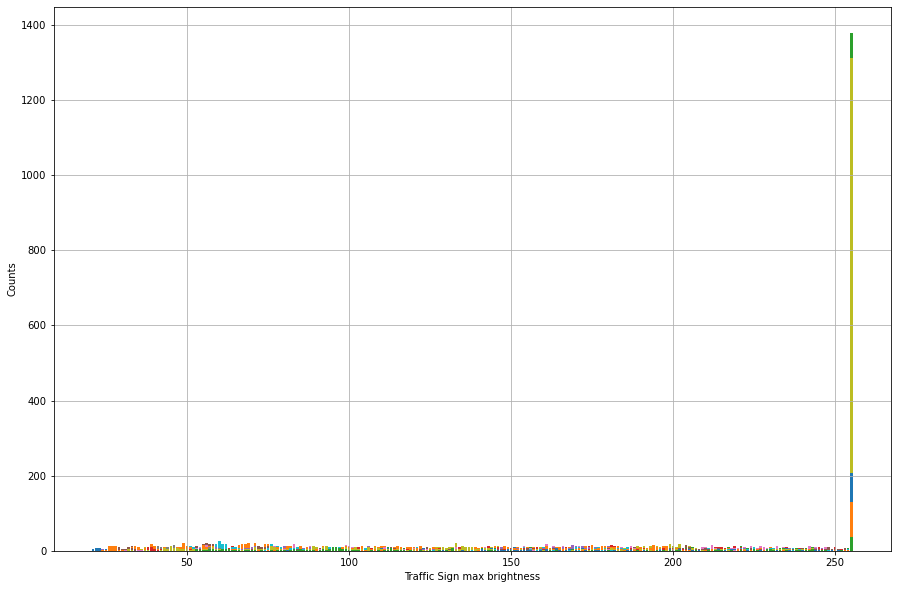

In [112]:
brightness = {}

for idx in range(39209):
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    H, S, V = cv2.split(img)
    
    classId = data.iloc[idx]['ClassId']
    val = max(np.concatenate(V))
    if classId not in brightness:
        brightness[classId] = [val]
    else:
        brightness[classId].append(val)

for idx in brightness:
    hist = Counter(brightness[idx])
    plt.bar(hist.keys(), hist.values()), plt.grid(True)
    plt.xlabel('Traffic Sign max brightness'), plt.ylabel('Counts')

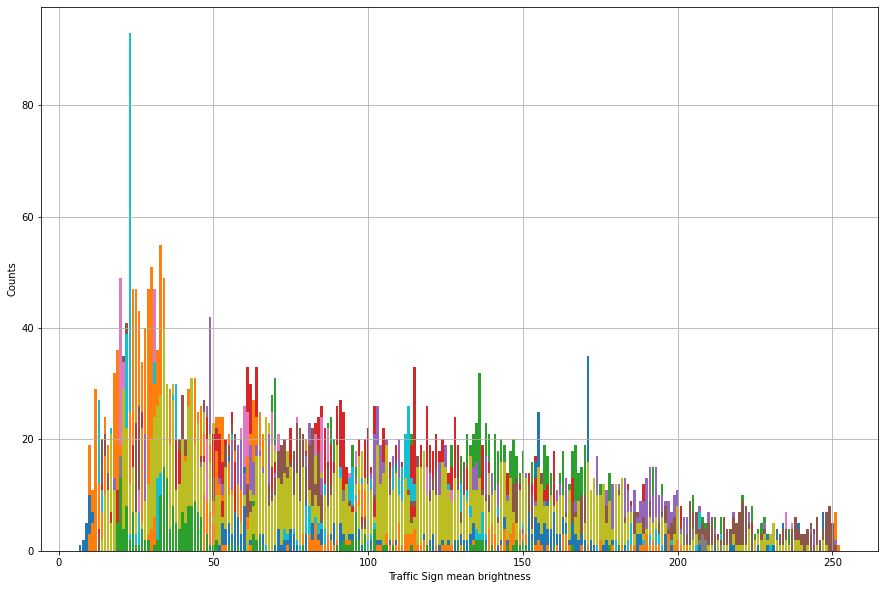

In [113]:
from statistics import mean

brightness = {}

for idx in range(39209):
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    H, S, V = cv2.split(img)
    
    classId = data.iloc[idx]['ClassId']
    val = mean(np.concatenate(V))
    if classId not in brightness:
        brightness[classId] = [val]
    else:
        brightness[classId].append(val)

for idx in brightness:
    hist = Counter(brightness[idx])
    plt.bar(hist.keys(), hist.values()), plt.grid(True)
    plt.xlabel('Traffic Sign mean brightness'), plt.ylabel('Counts')

In the current implementation, we can't see which class has which color. Class represented as orange color is dark; yellow-green is balansed with mean blightness, but we can see, that is has a lot of bright pixels and dark also; brown is bright enough.
So, I think that dataset is balanced by looking at the brightness distribution.